In [12]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import time
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import numpy as np
import matplotlib.pyplot as plt
import squarify
import random

In [4]:
jobs_results = pd.read_csv("../../Data/jobs_results_with_coords.csv")

display(jobs_results.shape)
display(jobs_results.head())

(591, 15)

,title,company_name,location,via,description,qualifications,responsibilities,benefits,job_id,search_name,search_location,schedule_type,category,latitude,longitude
0,Senior Blockchain Software Engineer,Truist,Anywhere,via ZipRecruiter,The position is described below. If you want t...,Language Fluency: English (Required)\nThe requ...,Deliver highly complex solutions with signific...,General Description of Available Benefits for ...,eyJqb2JfdGl0bGUiOiJTZW5pb3IgQmxvY2tjaGFpbiBTb2...,block-chain-1,USA,Full-time,Block Chain,NaN,NaN
1,Get twitter accounts that are tied to blockcha...,Upwork,Anywhere,via Upwork,I am looking for a list of blockchain addresse...,NaN,NaN,NaN,eyJqb2JfdGl0bGUiOiJHZXQgdHdpdHRlciBhY2NvdW50cy...,block-chain-1,USA,Contractor,Block Chain,NaN,NaN
2,Blockchain Analyst,Allium,"New York, New York",via Jobs,About the role\n• Sherlock & Enola Holmes leve...,Ability to parse and understand EVM (and/or So...,Tackling interesting problems - we are ingesti...,An accelerated growth trajectory - you will ha...,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEFuYWx5c3QiLC...,block-chain-1,USA,Full-time,Block Chain,40.712728,-74.006015
3,Full Stack Blockchain Engineer,geojam,"Los Angeles, California",via AngelList,"Who We Are\n\nLaunched in 2020, Geojam is a so...",We’re looking for a capable generalist enginee...,You will be designing and building our core so...,"We’re wrapping up our presale for $JAM, so you...",eyJqb2JfdGl0bGUiOiJGdWxsIFN0YWNrIEJsb2NrY2hhaW...,block-chain-1,USA,Full-time,Block Chain,34.053691,-118.242766
4,Blockchain Engineer - Apps Platform at Exodus ...,Exodus,"Livermore, California","via Livermore, CA - Geebo",Exodus is looking for a detail-orientated Bloc...,NaN,NaN,NaN,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIC...,block-chain-1,USA,Full-time,Block Chain,37.682058,-121.768053


### Density of Data Science Jobs

In [5]:
location_counts = jobs_results.dropna(subset=['latitude', 'longitude'])


m = folium.Map(location=[location_counts['latitude'].mean(), location_counts['longitude'].mean()], zoom_start=4)

marker_cluster = MarkerCluster().add_to(m)

for idx, row in location_counts.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']], 
        tooltip=row['location']
    ).add_to(marker_cluster)

m.save('../../Report/Outputs/folium_job_counts.html')
m

### Job viewer

In [6]:
# clean the state column
jobs_results['state'] = jobs_results['location'].apply(lambda x: x.split(', ')[-1]) # put in a separate column
jobs_results['state'] = jobs_results['state'].apply(lambda x: x.split('(')[0].strip()) # remove the parenthesis and trim the whitespace

display(jobs_results.head())

,title,company_name,location,via,description,qualifications,responsibilities,benefits,job_id,search_name,search_location,schedule_type,category,latitude,longitude,state
0,Senior Blockchain Software Engineer,Truist,Anywhere,via ZipRecruiter,The position is described below. If you want t...,Language Fluency: English (Required)\nThe requ...,Deliver highly complex solutions with signific...,General Description of Available Benefits for ...,eyJqb2JfdGl0bGUiOiJTZW5pb3IgQmxvY2tjaGFpbiBTb2...,block-chain-1,USA,Full-time,Block Chain,NaN,NaN,Anywhere
1,Get twitter accounts that are tied to blockcha...,Upwork,Anywhere,via Upwork,I am looking for a list of blockchain addresse...,NaN,NaN,NaN,eyJqb2JfdGl0bGUiOiJHZXQgdHdpdHRlciBhY2NvdW50cy...,block-chain-1,USA,Contractor,Block Chain,NaN,NaN,Anywhere
2,Blockchain Analyst,Allium,"New York, New York",via Jobs,About the role\n• Sherlock & Enola Holmes leve...,Ability to parse and understand EVM (and/or So...,Tackling interesting problems - we are ingesti...,An accelerated growth trajectory - you will ha...,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEFuYWx5c3QiLC...,block-chain-1,USA,Full-time,Block Chain,40.712728,-74.006015,New York
3,Full Stack Blockchain Engineer,geojam,"Los Angeles, California",via AngelList,"Who We Are\n\nLaunched in 2020, Geojam is a so...",We’re looking for a capable generalist enginee...,You will be designing and building our core so...,"We’re wrapping up our presale for $JAM, so you...",eyJqb2JfdGl0bGUiOiJGdWxsIFN0YWNrIEJsb2NrY2hhaW...,block-chain-1,USA,Full-time,Block Chain,34.053691,-118.242766,California
4,Blockchain Engineer - Apps Platform at Exodus ...,Exodus,"Livermore, California","via Livermore, CA - Geebo",Exodus is looking for a detail-orientated Bloc...,NaN,NaN,NaN,eyJqb2JfdGl0bGUiOiJCbG9ja2NoYWluIEVuZ2luZWVyIC...,block-chain-1,USA,Full-time,Block Chain,37.682058,-121.768053,California


In [7]:
# get unique states
unique_states = sorted(jobs_results['state'].unique())

# move 'Anywhere' first
if 'Anywhere' in unique_states:
    unique_states.remove('Anywhere')
    unique_states.insert(0, 'Anywhere')


# init the figure
fig = make_subplots(rows=1, cols=1, specs=[[{"type": "table"}]])

# add a table trace for each state
for state in unique_states:
    
    filtered_jobs_results = jobs_results[jobs_results['state'] == state]
    
    trace = go.Table(
        header=dict(values=["Title", "Company Name", "Schedule Type", "Category", "Location"]),
        
        cells=dict(values=[filtered_jobs_results['title'], filtered_jobs_results['company_name'], filtered_jobs_results['schedule_type'], filtered_jobs_results['category'], filtered_jobs_results['location']]),
        
        visible=False,
        
        name=state
    )
    fig.add_trace(trace)

# set first table trace to visible
fig.data[0].visible = True

# create dropdown
buttons = []


for i, state in enumerate(unique_states):
    visible = [False] * len(unique_states)
    visible[i] = True
    buttons.append(
        dict(
            label=state,
            method="update",
            args=[{"visible": visible},
                  {"title": f"Listings by Location"}]
        )
    )

# add dropdown to layour and format
fig.update_layout(
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=buttons,
            showactive=True,
            xanchor="right",
            x=1,
            yanchor="top",
            y=1.2
        )
    ],
    title="Listings by Location",
)

fig.show()


# save
pio.write_html(fig, file='../../Report/Outputs/jobs_table.html')

### Tree Map

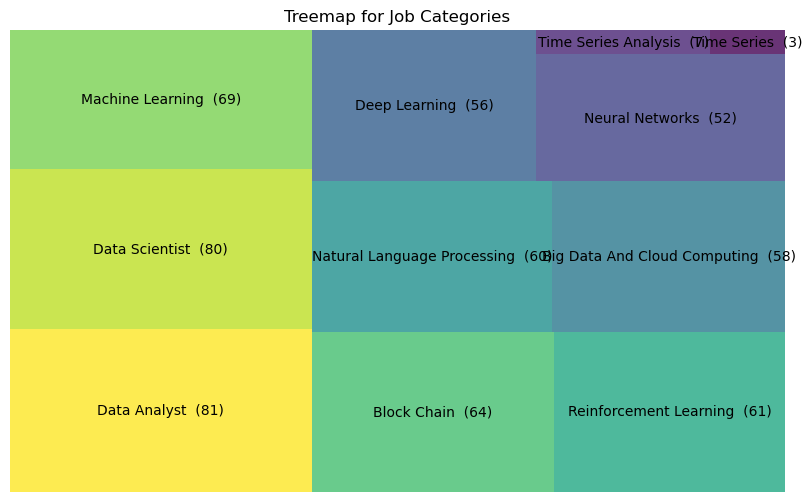

In [21]:


cat_col = jobs_results["category"]
# Create a DataFrame with category frequencies
cat_freq = cat_col.value_counts().reset_index()
cat_freq.columns = ['Category', 'Frequency']



# Combine the category name and count into a single label
cat_freq['Label'] = cat_freq['Category'] + ' (' + cat_freq['Frequency'].astype(str) + ')'

# Generate the treemap
fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis_r(np.linspace(0, 1, len(cat_freq)))
squarify.plot(sizes=cat_freq['Frequency'], label=cat_freq['Label'], color=colors, alpha=0.8, ax=ax, text_kwargs={'fontsize': 10})

ax.axis('off')
plt.title("Treemap for Job Categories")
plt.show()